In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('household_power_consumption.txt',sep=';')

F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.shape

(2075259, 9)

In [4]:
df = pd.read_csv('household_power_consumption.txt',sep=';',nrows=100000)

In [5]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
Date                     100000 non-null object
Time                     100000 non-null object
Global_active_power      100000 non-null object
Global_reactive_power    100000 non-null object
Voltage                  100000 non-null object
Global_intensity         100000 non-null object
Sub_metering_1           100000 non-null object
Sub_metering_2           100000 non-null object
Sub_metering_3           99992 non-null float64
dtypes: float64(1), object(8)
memory usage: 6.9+ MB


In [7]:
for x in df.columns:
    print(type(x))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [8]:
df['TimeStamp'] = df['Date']+' '+df['Time']

In [9]:
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])

In [10]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,TimeStamp
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [11]:
df.index = df['TimeStamp']

In [12]:
newdf = df.drop(['Date','Time','TimeStamp'],axis = 1)

In [13]:
newdf.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
TimeStamp,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [14]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100000 entries, 2006-12-16 17:24:00 to 2007-02-24 04:03:00
Data columns (total 7 columns):
Global_active_power      100000 non-null object
Global_reactive_power    100000 non-null object
Voltage                  100000 non-null object
Global_intensity         100000 non-null object
Sub_metering_1           100000 non-null object
Sub_metering_2           100000 non-null object
Sub_metering_3           99992 non-null float64
dtypes: float64(1), object(6)
memory usage: 6.1+ MB


In [15]:
newdf = newdf.convert_objects(convert_numeric=True)

F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [16]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100000 entries, 2006-12-16 17:24:00 to 2007-02-24 04:03:00
Data columns (total 7 columns):
Global_active_power      99992 non-null float64
Global_reactive_power    99992 non-null float64
Voltage                  99992 non-null float64
Global_intensity         99992 non-null float64
Sub_metering_1           99992 non-null float64
Sub_metering_2           99992 non-null float64
Sub_metering_3           99992 non-null float64
dtypes: float64(7)
memory usage: 6.1 MB


In [17]:
newdf.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
TimeStamp,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [18]:
newdf.isnull().sum()

Global_active_power      8
Global_reactive_power    8
Voltage                  8
Global_intensity         8
Sub_metering_1           8
Sub_metering_2           8
Sub_metering_3           8
dtype: int64

In [19]:
empty_df = newdf.loc[newdf['Global_intensity']==np.NAN,:]

In [20]:
empty_df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
TimeStamp,,,,,,,


In [21]:
newdf.shape

(100000, 7)

In [22]:
list(newdf.columns)

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3']

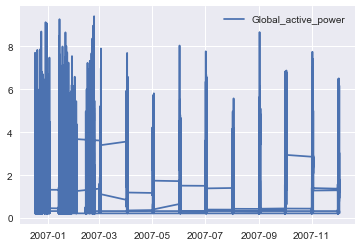

In [23]:
plt.plot(newdf.index,newdf['Global_active_power'])
plt.xlabel = "TimeStamp"
plt.yalbel = "Global_intensity"
plt.legend()

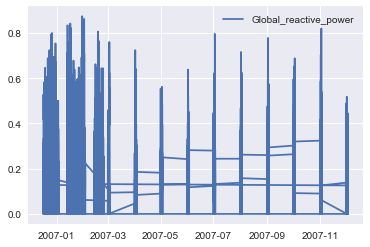

In [24]:
plt.plot(newdf.index,newdf['Global_reactive_power'])
plt.xlabel = "TimeStamp"
plt.yalbel = "Global_intensity"
plt.legend()

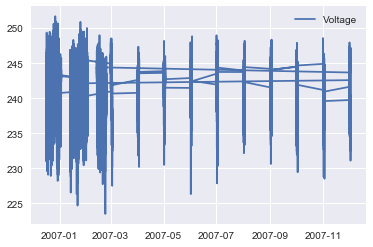

In [25]:
plt.plot(newdf.index,newdf['Voltage'])
plt.xlabel = "TimeStamp"
plt.yalbel = "Global_intensity"
plt.legend()

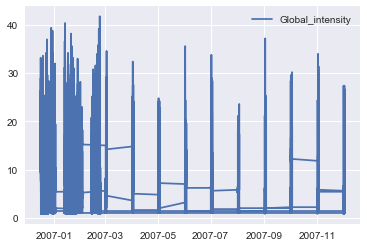

In [26]:
plt.plot(newdf.index,newdf['Global_intensity'])
plt.xlabel = "TimeStamp"
plt.yalbel = "Global_intensity"
plt.legend()

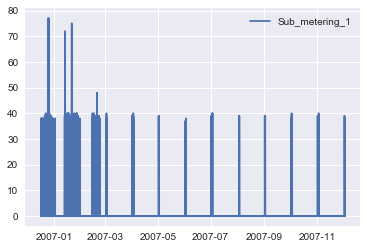

In [27]:
plt.plot(newdf.index,newdf['Sub_metering_1'])
plt.xlabel = "TimeStamp"
plt.yalbel = "Global_intensity"
plt.legend()

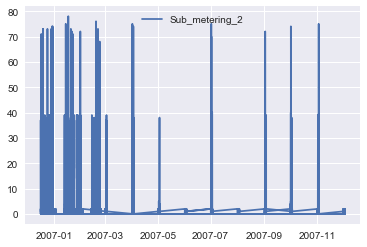

In [28]:
plt.plot(newdf.index,newdf['Sub_metering_2'])
plt.xlabel = "TimeStamp"
plt.yalbel = "Global_intensity"
plt.legend()

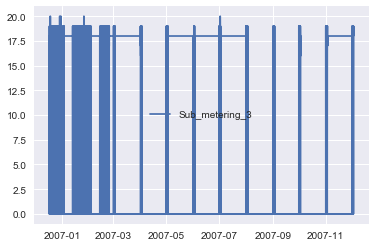

In [29]:
plt.plot(newdf.index,newdf['Sub_metering_3'])
plt.xlabel = "TimeStamp"
plt.yalbel = "Global_intensity"
plt.legend()

# Correlation between Global_active_power and Other Features

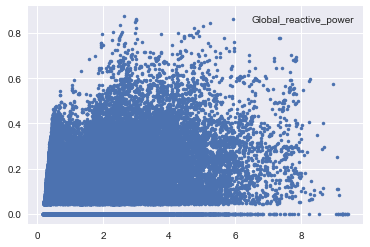

In [30]:
plt.plot(newdf['Global_active_power'],newdf['Global_reactive_power'],'.')
plt.legend()

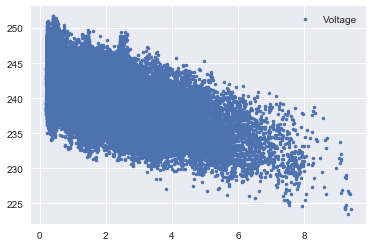

In [31]:
plt.plot(newdf['Global_active_power'],newdf['Voltage'],'.')
plt.legend()

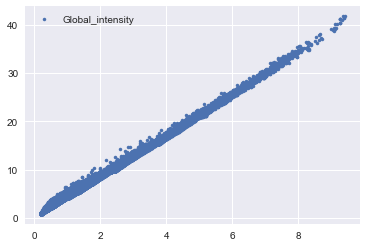

In [32]:
plt.plot(newdf['Global_active_power'],newdf['Global_intensity'],'.')
plt.legend()

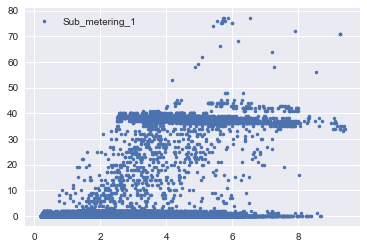

In [33]:
plt.plot(newdf['Global_active_power'],newdf['Sub_metering_1'],'.')
plt.legend()

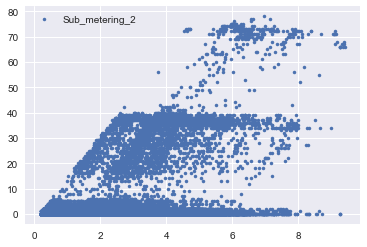

In [34]:
plt.plot(newdf['Global_active_power'],newdf['Sub_metering_2'],'.')
plt.legend()

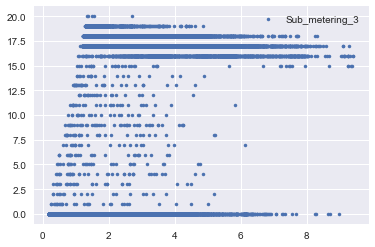

In [35]:
plt.plot(newdf['Global_active_power'],newdf['Sub_metering_3'],'.')
plt.legend()

# Correlation between Global_reactive_power and other features

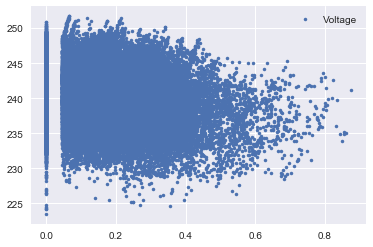

In [36]:
plt.plot(newdf['Global_reactive_power'],newdf['Voltage'],'.')
plt.legend()

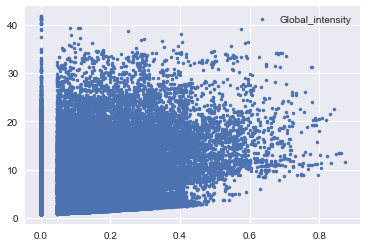

In [37]:
plt.plot(newdf['Global_reactive_power'],newdf['Global_intensity'],'.')
plt.legend()

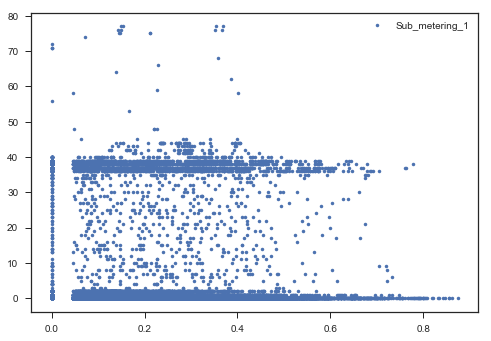

In [41]:
plt.plot(newdf['Global_reactive_power'],newdf['Sub_metering_1'],'.')
plt.legend()

In [42]:
sns.set(style="ticks", color_codes=True)

F:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
F:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
F:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


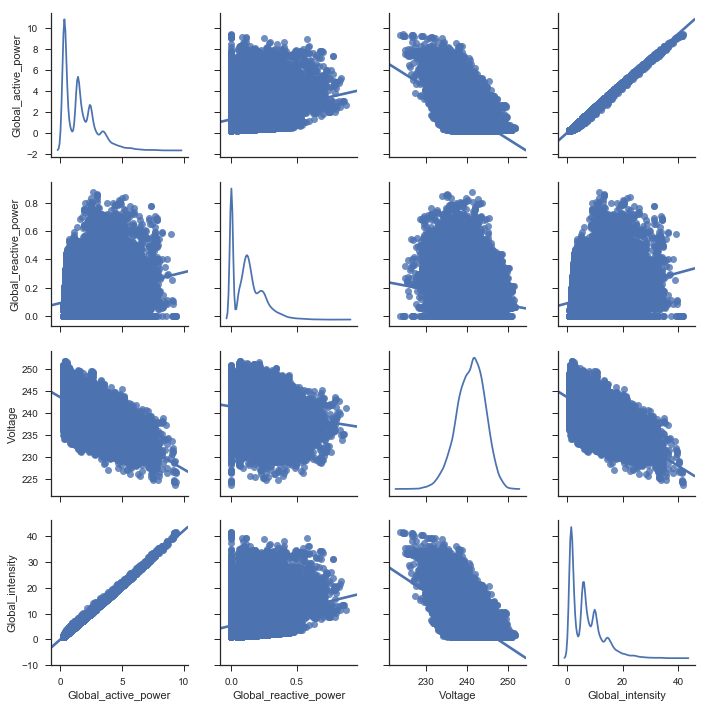

In [45]:
sns.pairplot(newdf,kind="reg",diag_kind="kde",vars=["Global_active_power",'Global_reactive_power','Voltage','Global_intensity'])

F:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
F:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
F:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


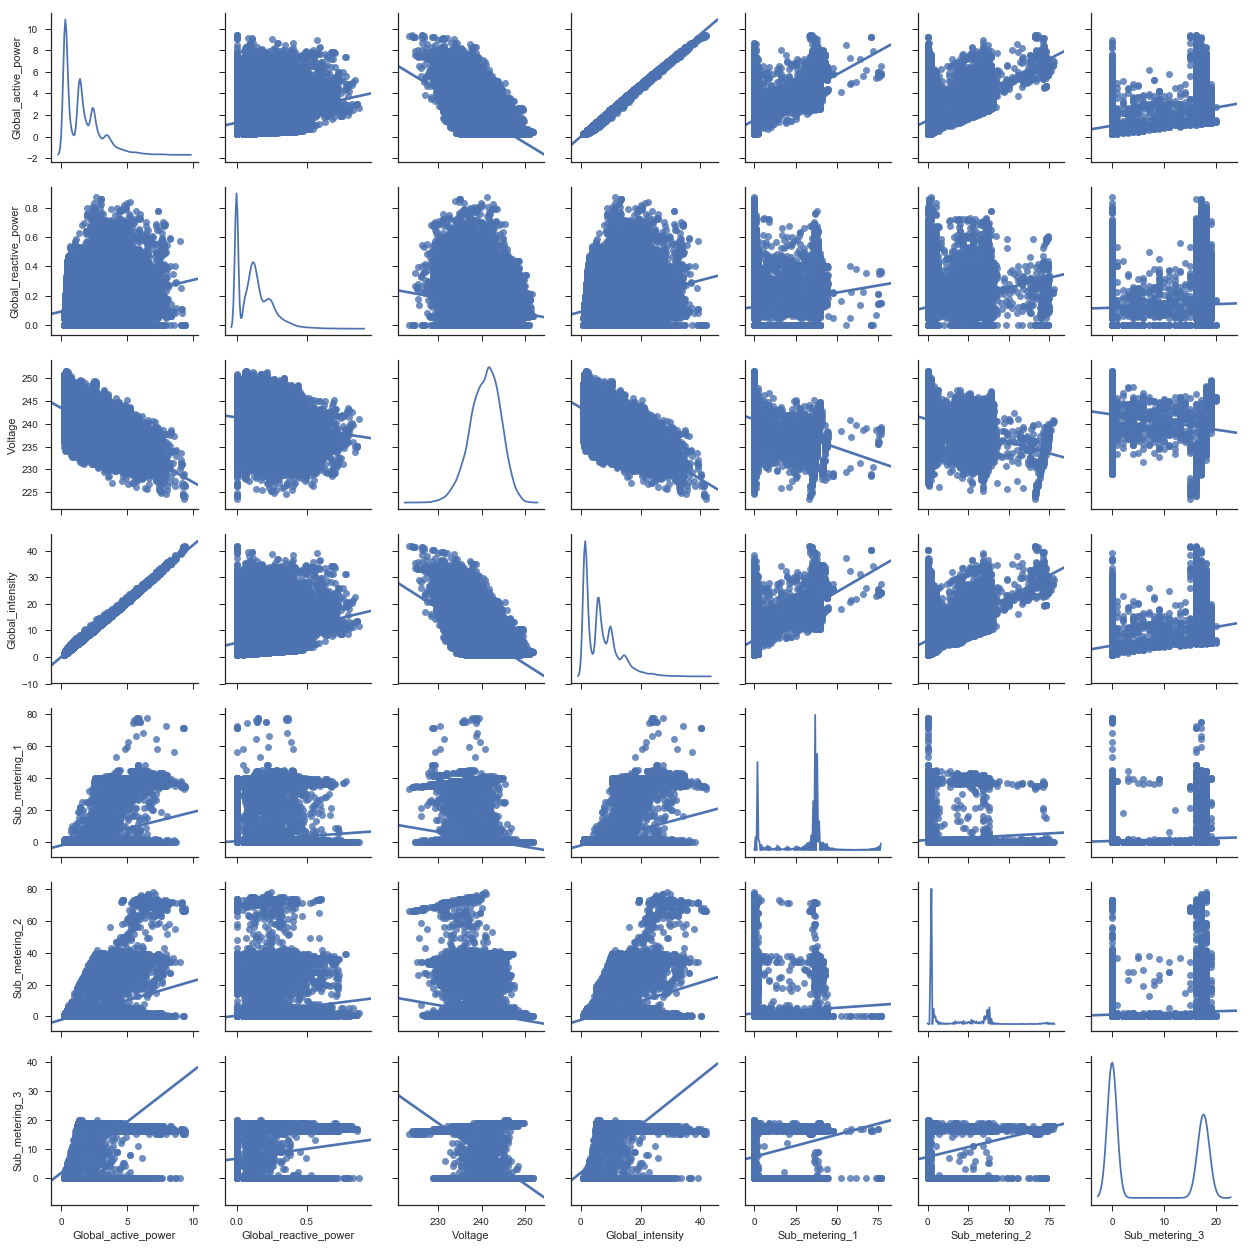

In [46]:
sns.pairplot(newdf,kind="reg",diag_kind="kde")